In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

## Data Collcetion

In [3]:
df = pd.read_csv("forestfires.csv")
df.head()

,Unnamed: 0,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,...,0,0,0,0,1,0,0,0,0,small
1,2,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,...,0,0,0,0,0,0,0,1,0,small
2,3,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,...,0,0,0,0,0,0,0,1,0,small
3,4,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,...,0,0,0,0,1,0,0,0,0,small
4,5,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df = df.drop(['month'], axis=1)
df = df.drop(['day'], axis=1)
df.head()

,Unnamed: 0,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,...,0,0,0,0,1,0,0,0,0,small
1,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,...,0,0,0,0,0,0,0,1,0,small
2,3,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,...,0,0,0,0,0,0,0,1,0,small
3,4,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,...,0,0,0,0,1,0,0,0,0,small
4,5,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,...,0,0,0,0,1,0,0,0,0,small


## Exploratory Data Analysis

In [5]:
df.shape

(517, 30)

In [6]:
df.isnull().sum()

Unnamed: 0       0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,259.000000,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,149.389312,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,130.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,259.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,388.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,517.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

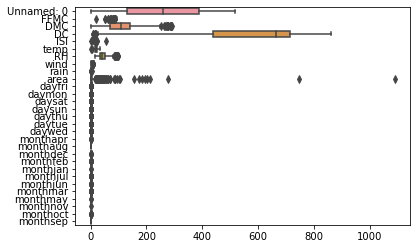

In [8]:
sns.boxplot(data = df, orient = "h")

C:\Users\aaa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


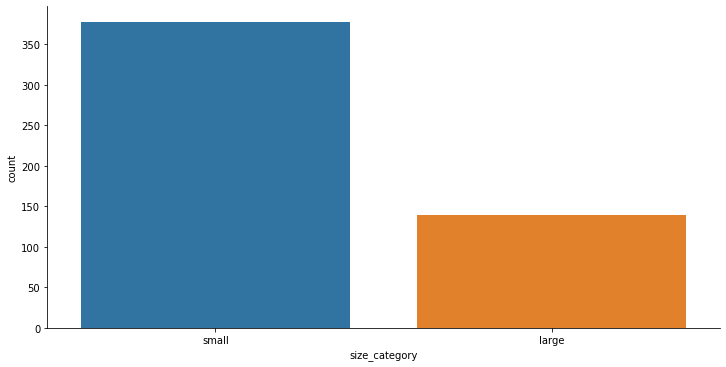

In [9]:
sns.catplot('size_category', data=df, kind="count",height = 5,aspect = 2)

In [10]:
X = np.array(df.iloc[:,0:28])
Y = np.array(df.iloc[:,28])

In [11]:
X = scale(X)

## Neural Network Model

In [12]:
from sklearn.neural_network import MLPClassifier

#increasing the hidden layers gives more accuracy
clf = MLPClassifier(activation ='relu',solver='lbfgs', alpha=0.0001,hidden_layer_sizes=(3), random_state=1)
clf.fit(X,Y)

pred_values = clf.predict(X)

In [13]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

confusion_matrix = confusion_matrix(Y,pred_values)
confusion_matrix

array([[345,   0],
       [  0, 172]], dtype=int64)

In [14]:
classification_report = classification_report(Y,pred_values)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00       172

    accuracy                           1.00       517
   macro avg       1.00      1.00      1.00       517
weighted avg       1.00      1.00      1.00       517



In [18]:
print("Accuracy:",metrics.accuracy_score(Y,pred_values))

Accuracy: 1.0
